# Importing the libraries and pipeline

In [1]:
import os
import pandas as pd
import numpy as np
import xgboost as xgb
import sys
pd.set_option('display.max_columns', None)



In [2]:
src_path = os.path.abspath(os.path.join(os.getcwd(), "../../../src"))
sys.path.append(src_path)
from pipeline import ModelPipeline


In [3]:
xgb_pipeline = ModelPipeline(dataset_path='/Users/abhitay/Developer/Columbia_projects/CAP/dsi-capstone-spring-2025-TD-anti-money-laundering/Code/Abhitay/IBM/Subset Transactions.csv')

xgb_pipeline.run_preprocessing()

xgb_pipeline.df

Running preprocessing pipeline...

Creating unique ids...

Normalizing currency...

Extracting time features...

Adding cyclical encoding to time feats...

Applying label encoding...

Label encoding applied to columns: ['day_of_week', 'from_bank', 'to_bank']

Applying one hot encoding...

/Users/abhitay/anaconda3/envs/def/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/abhitay/anaconda3/envs/def/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(
/Users/abhitay/anaconda3/envs/def/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(
/Users/abhitay/anaconda3/envs/def/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


One hot encoding applied to columns: ['payment_type', 'received_currency', 'sent_currency']

Extracting graph features...

Using default weight columns: ['sent_amount', 'received_amount']

Graph features computed using: ['sent_amount', 'received_amount']

**Note**, previously graph-based features were calculated using only `sent_amount` as edge weight (only based on 
outgoing transactions). Now both sent and received amounts are included by default.

New feature columns added: degree_centrality_sent_amount, degree_centrality_received_amount, 
pagerank_sent_amount, pagerank_received_amount

Preprocessing completed successfully!

{
    'renamed': True,
    'duplicates_removed': True,
    'unique_ids_created': True,
    'currency_normalized': True,
    'time_features_extracted': True,
    'cyclical_encoded': True,
    'weekend_encoded': True,
    'label_encoded': True,
    'neighbor_context_computed': True,
    'normalized': False,
    'onehot_encoded': True
}

,from_bank,to_bank,received_amount,sent_amount,is_laundering,from_account_id,to_account_id,from_account_idx,to_account_idx,sent_amount_usd,received_amount_usd,hour_of_day,day_of_week,seconds_since_midnight,timestamp_int,timestamp_scaled,day_sin,day_cos,time_of_day_sin,time_of_day_cos,is_weekend,received_currency_Australian Dollar,received_currency_Bitcoin,received_currency_Brazil Real,received_currency_Canadian Dollar,received_currency_Euro,received_currency_Mexican Peso,received_currency_Ruble,received_currency_Rupee,received_currency_Saudi Riyal,received_currency_Shekel,received_currency_Swiss Franc,received_currency_UK Pound,received_currency_US Dollar,received_currency_Yen,received_currency_Yuan,sent_currency_Australian Dollar,sent_currency_Bitcoin,sent_currency_Brazil Real,sent_currency_Canadian Dollar,sent_currency_Euro,sent_currency_Mexican Peso,sent_currency_Ruble,sent_currency_Rupee,sent_currency_Saudi Riyal,sent_currency_Shekel,sent_currency_Swiss Franc,sent_currency_UK Pound,sent_currency_US Dollar,sent_currency_Yen,sent_currency_Yuan,payment_type_ACH,payment_type_Bitcoin,payment_type_Cash,payment_type_Cheque,payment_type_Credit Card,payment_type_Reinvestment,payment_type_Wire,degree_centrality_sent_amount,pagerank_sent_amount,degree_centrality_received_amount,pagerank_received_amount
0,8,8,3697.340000,3697.340000,0,10_8000EBD30,10_8000EBD30,0,0,3.697340e+03,3.697340e+03,0,3,1200,1.661992e+09,1.661992e+09,0.433884,-0.900969,0.087156,0.996195,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000139,0.000050,0.000139,0.000050
1,109,0,0.010000,0.010000,0,3208_8000F4580,1_8000F5340,1,81239,1.000000e-02,1.000000e-02,0,3,1200,1.661992e+09,1.661992e+09,0.433884,-0.900969,0.087156,0.996195,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000019,0.000001,0.000019,0.000001
2,10,10,2806.970000,2806.970000,0,12_8000F5030,12_8000F5030,2,2,2.806970e+03,2.806970e+03,0,3,120,1.661991e+09,1.661991e+09,0.433884,-0.900969,0.008727,0.999962,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000195,0.000243,0.000195,0.000243
3,8,8,36682.970000,36682.970000,0,10_8000F5200,10_8000F5200,3,3,3.668297e+04,3.668297e+04,0,3,360,1.661991e+09,1.661991e+09,0.433884,-0.900969,0.026177,0.999657,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000121,0.000008,0.000121,0.000008
4,0,0,6162.440000,6162.440000,0,1_8000F5AD0,1_8000F5AD0,4,4,6.162440e+03,6.162440e+03,0,3,180,1.661991e+09,1.661991e+09,0.433884,-0.900969,0.013090,0.999914,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000177,0.000092,0.000177,0.000092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250896,4222,3797,0.000223,0.000223,0,152627_813D6AFF1,53744_814237D21,48362,48634,1.876695e-08,1.876695e-08,23,5,85260,1.662853e+09,1.662853e+09,-0.974928,-0.222521,-0.082808,0.996566,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000046,0.000007,0.000046,0.000007
1250897,4672,4671,0.417737,0.417737,0,254565_8147A3EC1,254355_8147A3E21,48834,75038,3.515537e-05,3.515537e-05,23,5,84720,1.662853e+09,1.662853e+09,-0.974928,-0.222521,-0.121869,0.992546,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.

# Engineering One Hop Features

In [4]:
# Start with OG df
og_df = xgb_pipeline.df.copy()
og_df["TxID"] = og_df.index

# Keep minimal for aggregation
df = og_df[['from_account_id', 'to_account_id', 'sent_amount_usd']].copy()
df["TxID"] = df.index

# Prepare forward and backward df
forward_df = df[['TxID', 'from_account_id', 'sent_amount_usd']].rename(
    columns={'TxID': 'forward_TxID', 'from_account_id': 'receiver', 'sent_amount_usd': 'forward_amount'}
)

backward_df = df[['TxID', 'to_account_id', 'sent_amount_usd']].rename(
    columns={'TxID': 'backward_TxID', 'to_account_id': 'sender', 'sent_amount_usd': 'backward_amount'}
)

# Forward Join
df_forward = df.merge(forward_df, how='left', left_on='to_account_id', right_on='receiver')
df_forward = df_forward[(df_forward['forward_TxID'].isna()) | (df_forward['TxID'] != df_forward['forward_TxID'])]

# Backward Join
df_backward = df.merge(backward_df, how='left', left_on='from_account_id', right_on='sender')
df_backward = df_backward[(df_backward['backward_TxID'].isna()) | (df_backward['TxID'] != df_backward['backward_TxID'])]

# Aggregate One-Hop Features
fwd_stats = df_forward.groupby('TxID')['forward_amount'].agg(['min', 'max', 'mean', 'std']).add_prefix('onehop_forward_')
bwd_stats = df_backward.groupby('TxID')['backward_amount'].agg(['min', 'max', 'mean', 'std']).add_prefix('onehop_backward_')

# Merge One-hop Stats back to OG
df_final = og_df.merge(fwd_stats, on='TxID', how='left')
df_final = df_final.merge(bwd_stats, on='TxID', how='left')


In [5]:
xgb_pipeline.df = df_final.copy()

In [6]:
X1 = xgb_pipeline.df.columns
X_remove = ['TxID', 'is_laundering','from_account_id',	'to_account_id','from_account_idx','to_account_idx']

X = [x for x in X1 if x not in X_remove]

y = 'is_laundering'

In [7]:
xgb_pipeline.df

,from_bank,to_bank,received_amount,sent_amount,is_laundering,from_account_id,to_account_id,from_account_idx,to_account_idx,sent_amount_usd,received_amount_usd,hour_of_day,day_of_week,seconds_since_midnight,timestamp_int,timestamp_scaled,day_sin,day_cos,time_of_day_sin,time_of_day_cos,is_weekend,received_currency_Australian Dollar,received_currency_Bitcoin,received_currency_Brazil Real,received_currency_Canadian Dollar,received_currency_Euro,received_currency_Mexican Peso,received_currency_Ruble,received_currency_Rupee,received_currency_Saudi Riyal,received_currency_Shekel,received_currency_Swiss Franc,received_currency_UK Pound,received_currency_US Dollar,received_currency_Yen,received_currency_Yuan,sent_currency_Australian Dollar,sent_currency_Bitcoin,sent_currency_Brazil Real,sent_currency_Canadian Dollar,sent_currency_Euro,sent_currency_Mexican Peso,sent_currency_Ruble,sent_currency_Rupee,sent_currency_Saudi Riyal,sent_currency_Shekel,sent_currency_Swiss Franc,sent_currency_UK Pound,sent_currency_US Dollar,sent_currency_Yen,sent_currency_Yuan,payment_type_ACH,payment_type_Bitcoin,payment_type_Cash,payment_type_Cheque,payment_type_Credit Card,payment_type_Reinvestment,payment_type_Wire,degree_centrality_sent_amount,pagerank_sent_amount,degree_centrality_received_amount,pagerank_received_amount,TxID,onehop_forward_min,onehop_forward_max,onehop_forward_mean,onehop_forward_std,onehop_backward_min,onehop_backward_max,onehop_backward_mean,onehop_backward_std
0,8,8,3697.340000,3697.340000,0,10_8000EBD30,10_8000EBD30,0,0,3.697340e+03,3.697340e+03,0,3,1200,1.661992e+09,1.661992e+09,0.433884,-0.900969,0.087156,0.996195,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000139,0.000050,0.000139,0.000050,0,1.466600e+02,146.660000,146.660000,NaN,1.300000e-01,2.742300e+02,7.115308e+01,8.174975e+01
1,109,0,0.010000,0.010000,0,3208_8000F4580,1_8000F5340,1,81239,1.000000e-02,1.000000e-02,0,3,1200,1.661992e+09,1.661992e+09,0.433884,-0.900969,0.087156,0.996195,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000019,0.000001,0.000019,0.000001,1,6.481000e+01,829.870000,447.340000,540.979114,NaN,NaN,NaN,NaN
2,10,10,2806.970000,2806.970000,0,12_8000F5030,12_8000F5030,2,2,2.806970e+03,2.806970e+03,0,3,120,1.661991e+09,1.661991e+09,0.433884,-0.900969,0.008727,0.999962,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000195,0.000243,0.000195,0.000243,2,2.354000e+01,109192.020000,54607.780000,77193.772500,1.920000e+00,1.091920e+05,5.822441e+03,2.371108e+04
3,8,8,36682.970000,36682.970000,0,10_8000F5200,10_8000F5200,3,3,3.668297e+04,3.668297e+04,0,3,360,1.661991e+09,1.661991e+09,0.433884,-0.900969,0.026177,0.999657,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000121,0.000008,0.000121,0.000008,3,2.370000e+01,484537.000000,48681.193000,153144.488953,4.360000e+00,1.842600e+02,6.944636e+01,6.571090e+01
4,0,0,6162.440000,6162.440000,0,1_8000F5AD0,1_8000F5AD0,4,4,6.162440e+03,6.162440e+03,0,3,180,1.661991e+09,1.661991e+09,0.433884,-0.900969,0.013090,0.999914,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000177,0.000092,0.000177,0.000092,4,1.656580e+03,1656.580000,1656.580000,NaN,4.700000e-01,7.203300e+02,1.397756e+02,2.183317e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250896,4222,3797,0.000223,0.000223

# Training the Model

In [8]:
X_train, X_val, X_test, y_train, y_val, y_test = xgb_pipeline.split_train_test_val(X,y)

Data split using random_stratified method.

In [10]:
from sklearn.metrics import classification_report, roc_auc_score
import shap
import matplotlib.pyplot as plt
import catboost as cb

# CatBoost Model
model = cb.CatBoostClassifier(
    loss_function='Logloss',
    eval_metric='AUC',
    iterations=1000,
    depth=6,
    learning_rate=0.1,
    random_seed=42,
    verbose=100,
    early_stopping_rounds=10
)

model.fit(X_train, y_train, eval_set=(X_val, y_val), use_best_model=True)

# Evaluate
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}")


0:	test: 0.7350775	best: 0.7350775 (0)	total: 118ms	remaining: 1m 58s
100:	test: 0.9775830	best: 0.9775830 (100)	total: 5.15s	remaining: 45.8s
200:	test: 0.9808023	best: 0.9808023 (200)	total: 10s	remaining: 39.8s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.9815106571
bestIteration = 264

Shrink model to first 265 iterations.
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    186859
           1       0.93      0.32      0.47       777

    accuracy                           1.00    187636
   macro avg       0.96      0.66      0.73    187636
weighted avg       1.00      1.00      1.00    187636

ROC AUC Score: 0.9797


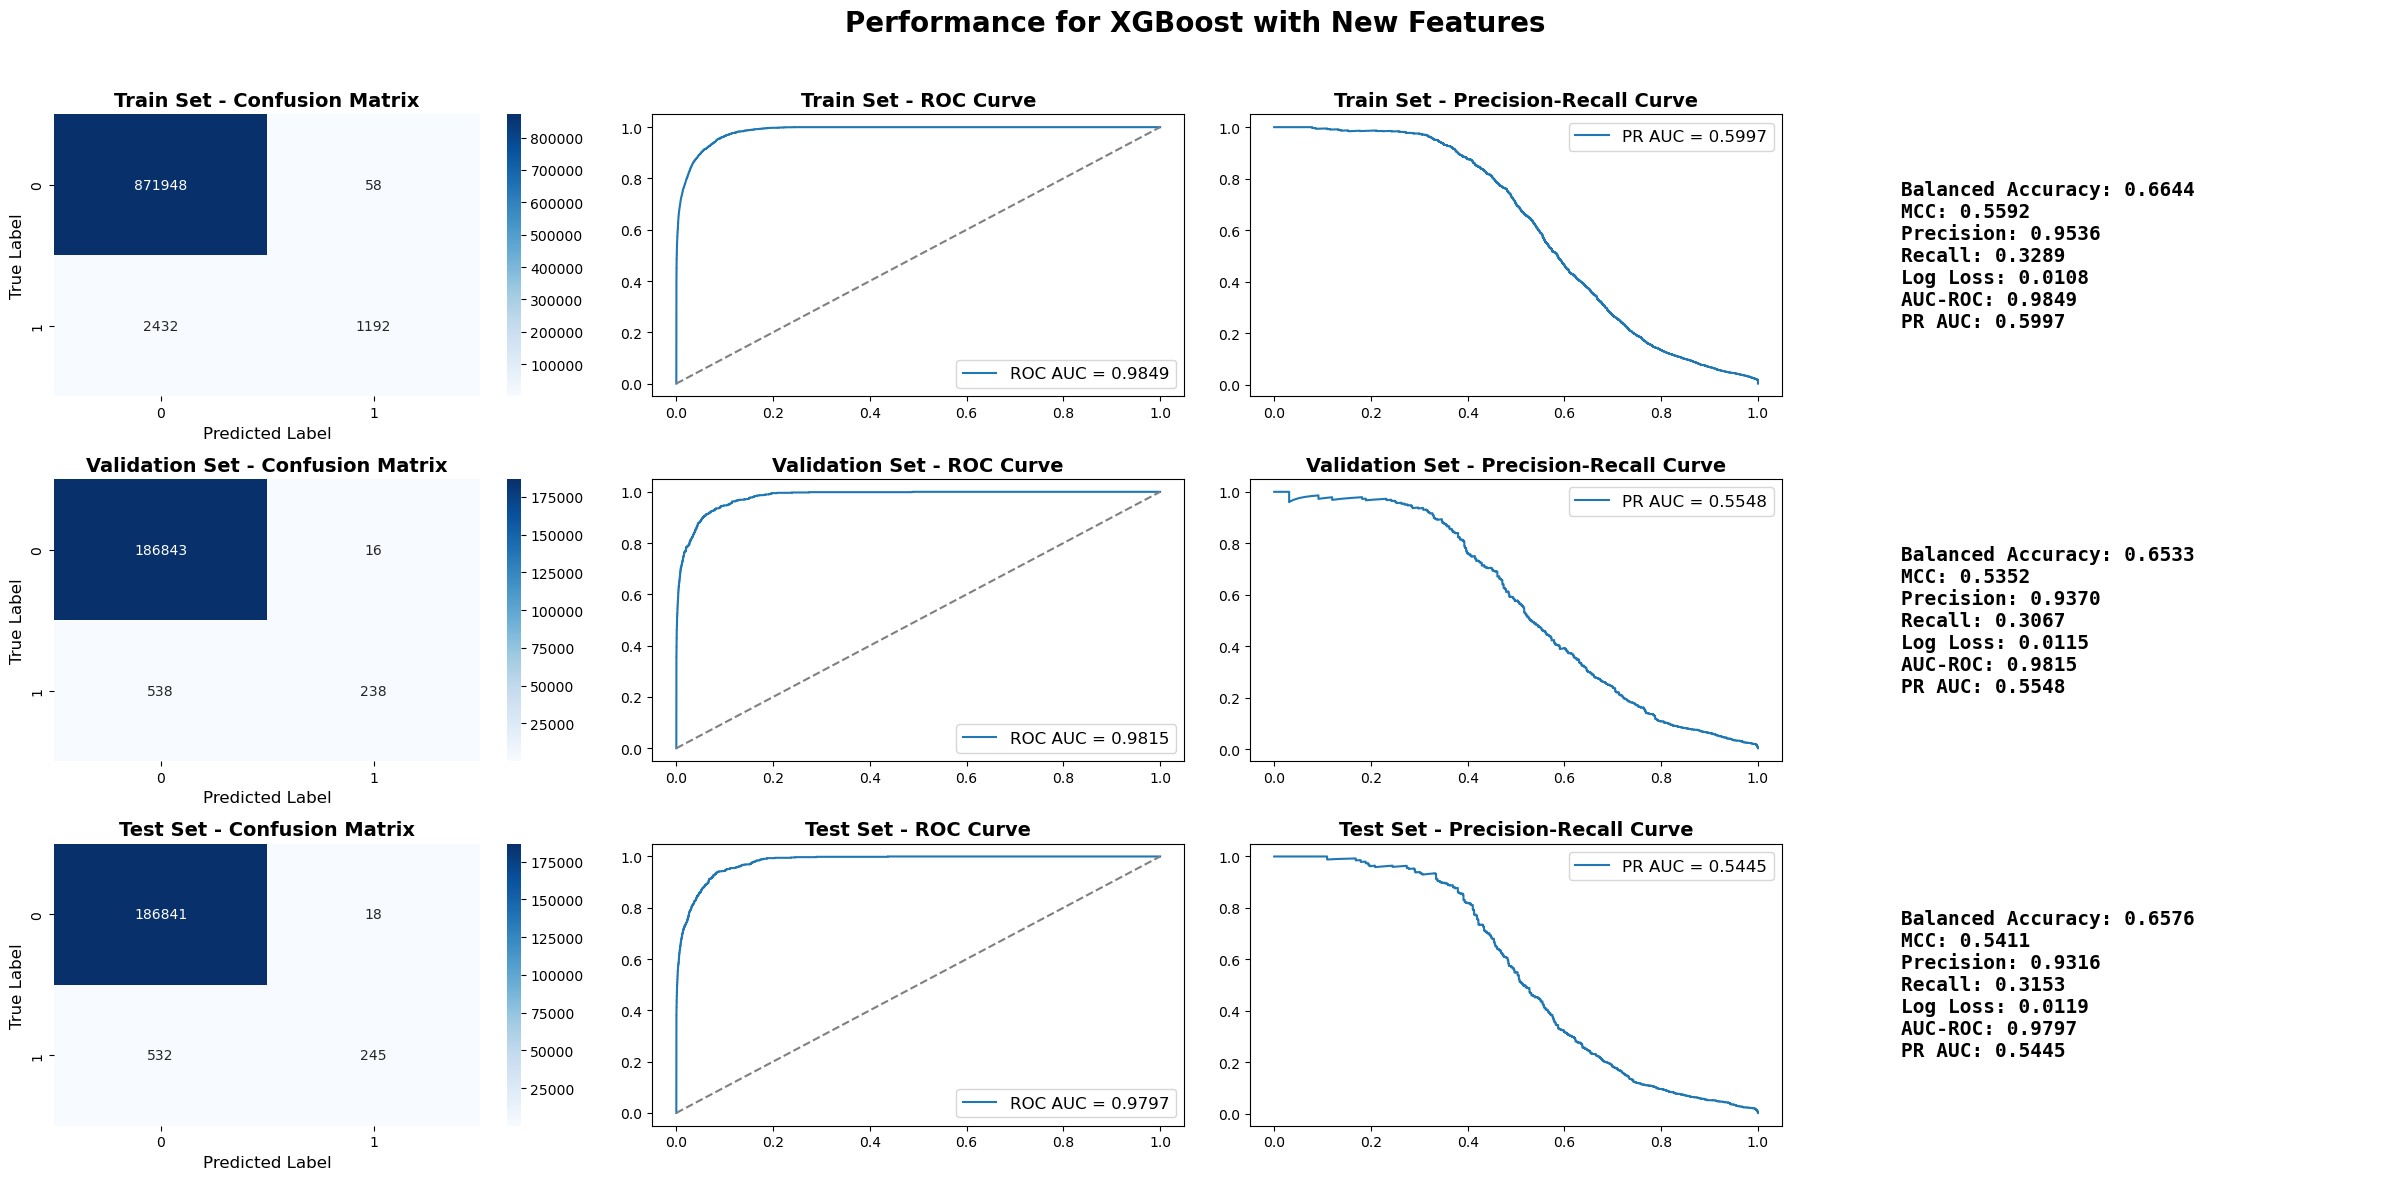

In [11]:
# Train predictions
train_proba = model.predict_proba(X_train)[:, 1]  # Get probability of class 1
train_pred = (train_proba > 0.5).astype(int)

# Validation predictions
val_proba = model.predict_proba(X_val)[:, 1]
val_pred = (val_proba > 0.5).astype(int)

# Test predictions
test_proba = model.predict_proba(X_test)[:, 1]
test_pred = (test_proba > 0.5).astype(int)


# Evaluate Model Performance
slide_title = "Performance for XGBoost with New Features"
metrics_summary = xgb_pipeline.result_metrics(
    slide_title,
    y_train, train_pred, train_proba,
    y_val, val_pred, val_proba,
    y_test, test_pred, test_proba,
    class_labels=["Licit", "Illicit"]
)


# SHAP Analysis

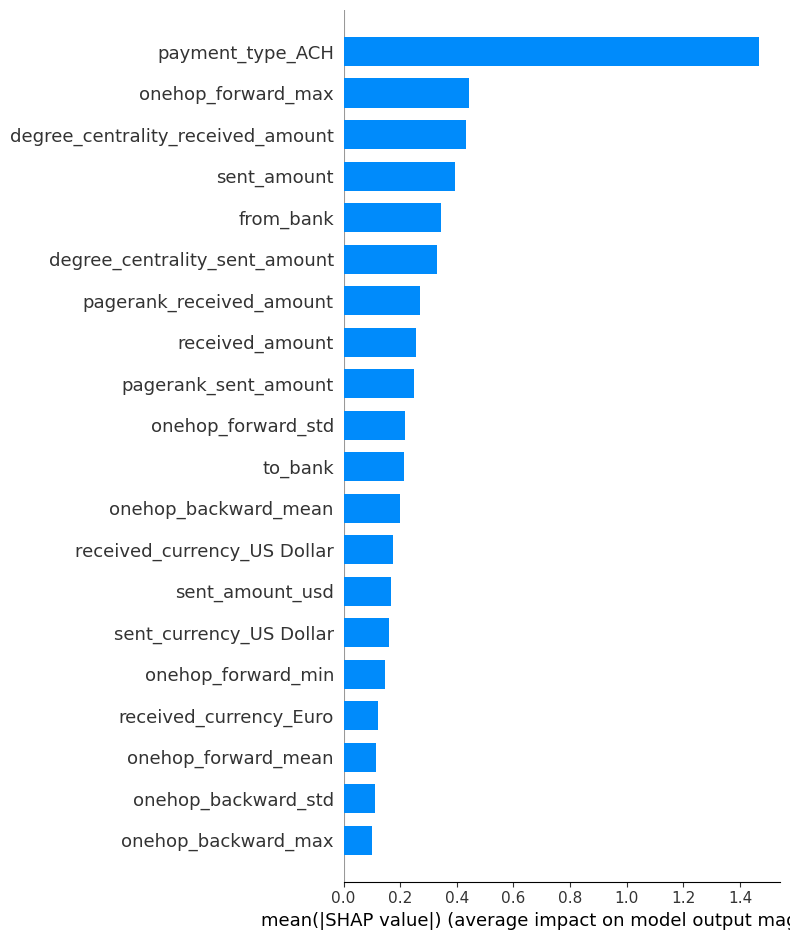

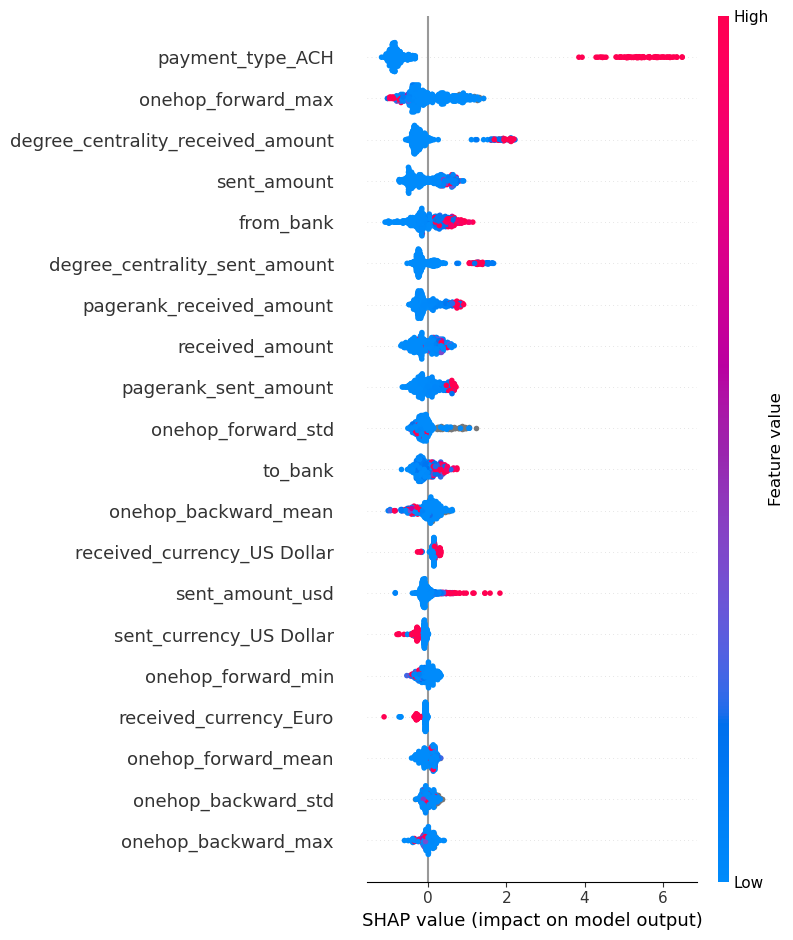

In [12]:
X_train = X_train.sample(n=500, random_state=42)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
shap_inter = explainer.shap_interaction_values(X_train)


# Summary Plot (Global Feature Importance)
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Optional: Summary dot plot (per-sample contribution)
shap.summary_plot(shap_values, X_train)

In [13]:
network_feats = [f for f in X_train.columns if 'pagerank' in f or 'centrality' in f or 'onehop' in f]
time_feats = [f for f in X_train.columns if 'hour' in f or 'day' in f or 'timestamp' in f]
currency_feats = [f for f in X_train.columns if 'currency' in f]
amount_feats = ['sent_amount', 'received_amount', 'sent_amount_usd', 'received_amount_usd']
payment_type_feats = [f for f in X_train.columns if 'payment_type' in f]

import numpy as np

# Convert SHAP values to DataFrame
shap_df = pd.DataFrame(shap_values, columns=X_train.columns)

for group_name, feature_list in {
    'Network': network_feats,
    'Time': time_feats,
    'Currency': currency_feats,
    'Amount': amount_feats,
    'Payment Type': payment_type_feats,
}.items():
    mean_impact = np.abs(shap_df[feature_list]).values.mean()
    print(f"{group_name}: {mean_impact:.4f}")



Network: 0.2257
Time: 0.0460
Currency: 0.0224
Amount: 0.2290
Payment Type: 0.2097


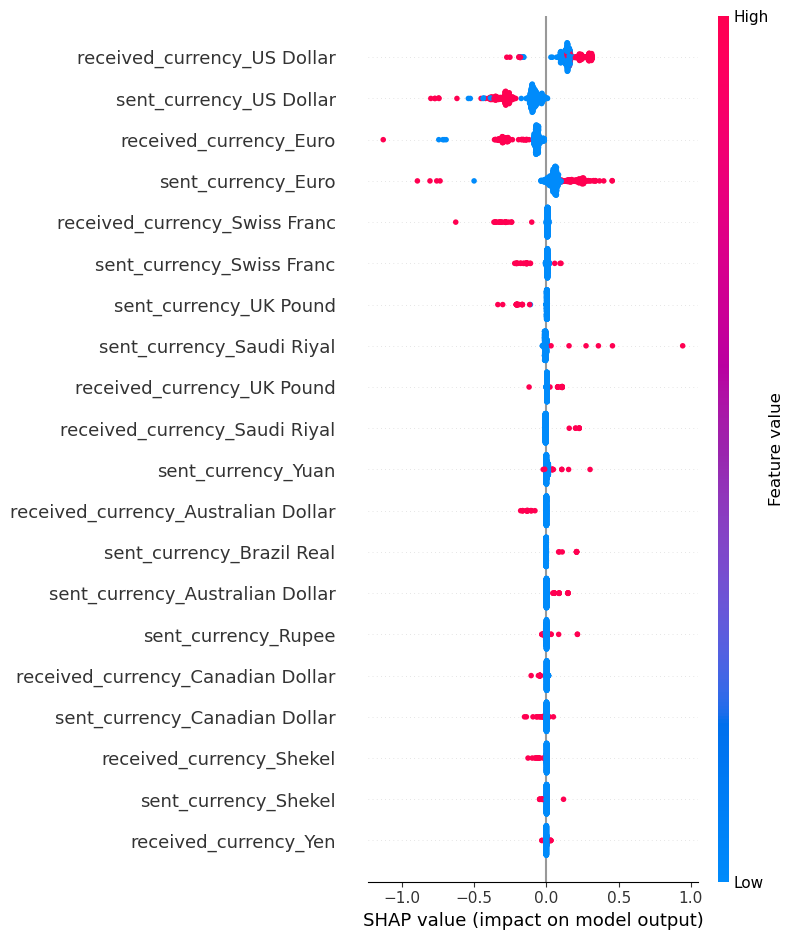

Network: 0.2257


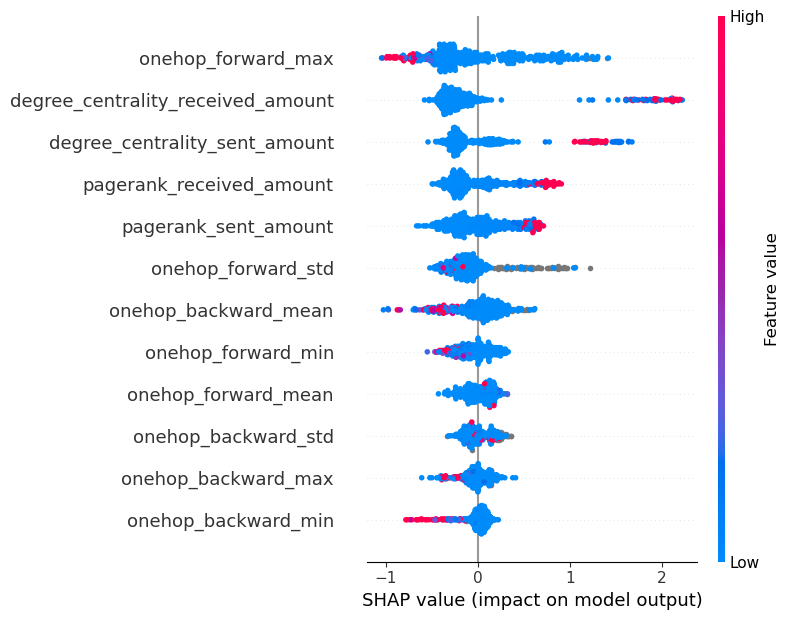

Time: 0.0460


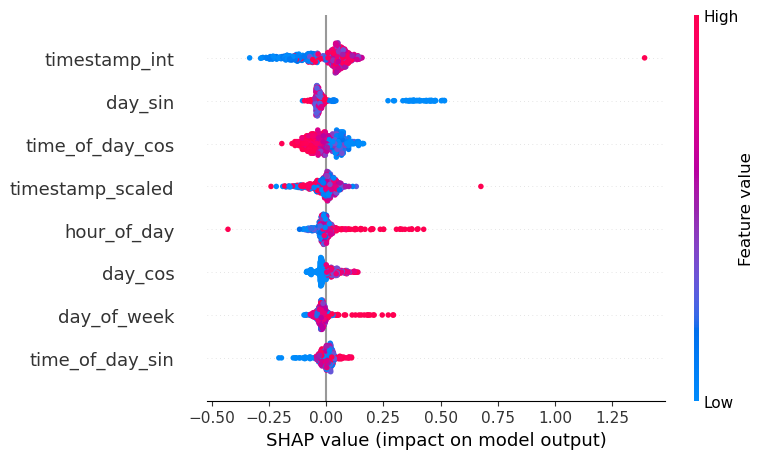

Currency: 0.0224


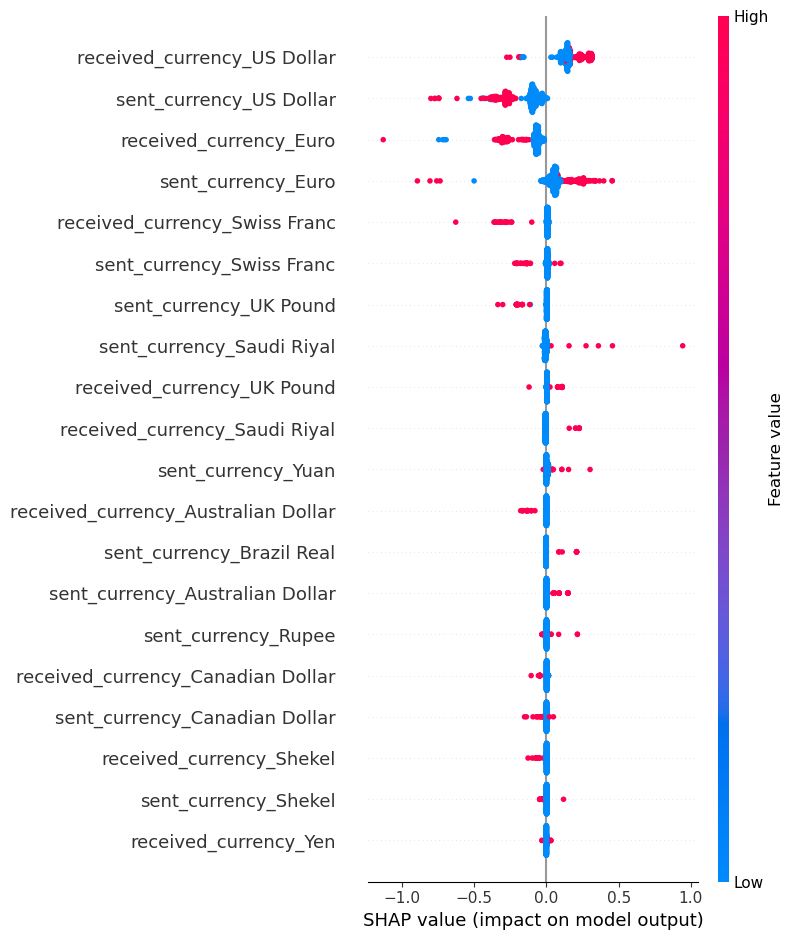

Amount: 0.2290


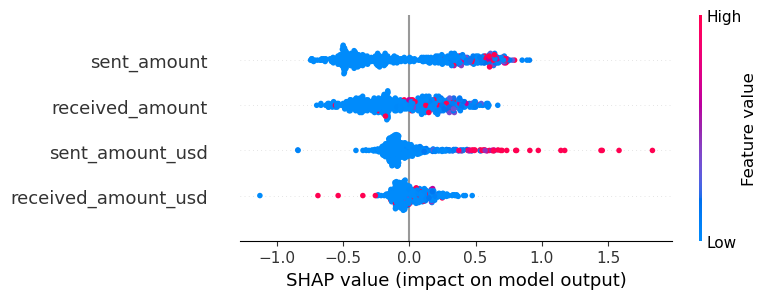

Payment Type: 0.2097


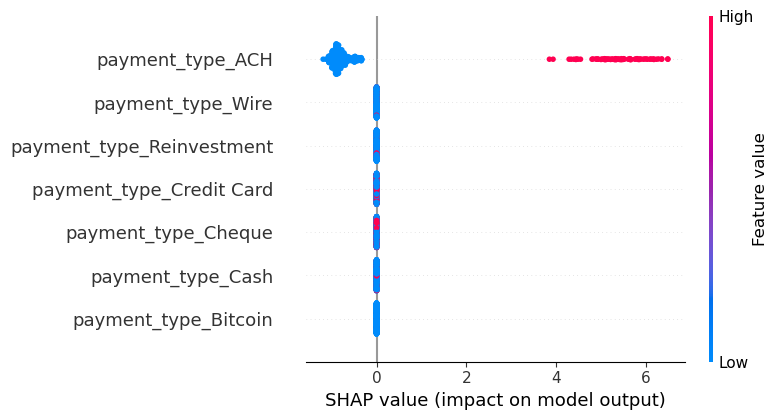

In [14]:
shap.summary_plot(shap_df[currency_feats].values, X_train[currency_feats])
for group_name, feature_list in {
    'Network': network_feats,
    'Time': time_feats,
    'Currency': currency_feats,
    'Amount': amount_feats,
    'Payment Type': payment_type_feats,
}.items():
    mean_impact = np.abs(shap_df[feature_list]).values.mean()
    print(f"{group_name}: {mean_impact:.4f}")
    shap.summary_plot(shap_df[feature_list].values, X_train[feature_list])
    
